# Install the Necessary Libraries

Name : Pratik Yuvraj Yawalkar

Roll No.  : AI23MTECH11006

Department : AI & ML

In [1]:
!pip install astroML numpy pandas scipy matplotlib

# 1. Redo figure 3.5 in astroml book https://www.astroml.org/book_figures/chapter3/fig_flux_errors.html with 5%, 10% and 20% flux error. Com-ment on whether the magnitude distribution is assymetric in all the three cases.

In [2]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm
import matplotlib as mlp
mlp.rcParams.update(mlp.rcParamsDefault)

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)

#------------------------------------------------------------
# Create our data
def plot_bar_first(std_dev: int)->None:
    # generate 10000 normally distributed points
    np.random.seed(1)
    dist = norm(1, std_dev)                  ################################## Changed !!!!!
    flux = dist.rvs(10000)
    flux_fit = np.linspace(0.001, 2, 1000)
    pdf_flux_fit = dist.pdf(flux_fit)

    # transform this distribution into magnitude space
    mag = -2.5 * np.log10(flux)
    mag_fit = -2.5 * np.log10(flux_fit)
    pdf_mag_fit = pdf_flux_fit.copy()
    pdf_mag_fit[1:] /= abs(mag_fit[1:] - mag_fit[:-1])
    pdf_mag_fit /= np.dot(pdf_mag_fit[1:], abs(mag_fit[1:] - mag_fit[:-1]))

    #------------------------------------------------------------
    # Plot the result
    fig = plt.figure(figsize=(5, 2.5))
    fig.subplots_adjust(bottom=0.17, top=0.9,
                        left=0.12, right=0.95, wspace=0.3)

    # first plot the flux distribution
    ax = fig.add_subplot(121)
    ax.hist(flux, bins=np.linspace(0, 2, 50),
            histtype='stepfilled', fc='gray', alpha=0.5, density=True)
    ax.plot(flux_fit, pdf_flux_fit, '-k')
    ax.plot([1, 1], [0, 2], ':k', lw=1)
    ax.set_xlim(-0.1, 2.1)
    ax.set_ylim(0, max(max(pdf_flux_fit), max(flux)))


    ax.set_xlabel(r'${\rm flux}$')
    ax.set_ylabel(r'$p({\rm flux})$')
    ax.yaxis.set_major_locator(plt.MultipleLocator(0.4))
    ax.text(0.04, 0.95, r'${\rm \%\ flux\ error = }$'+ str(std_dev * 100),
            ha='left', va='top', transform=ax.transAxes)

    # next plot the magnitude distribution
    ax = fig.add_subplot(122)
    ax.hist(mag, bins=np.linspace(-1, 2, 50),
            histtype='stepfilled', fc='gray', alpha=0.5, density=True)
    ax.plot(mag_fit, pdf_mag_fit, '-k')
    ax.plot([0, 0], [0, 2], ':k', lw=1)
    ax.set_xlim(-1.1, 1.1)
    ax.set_ylim(0, max(max(pdf_mag_fit), max(mag)))
    ax.yaxis.set_major_locator(plt.MultipleLocator(0.4))
    ax.text(0.04, 0.95, r'${\rm mag} = -2.5\log_{10}({\rm flux})$',
            ha='left', va='top', transform=ax.transAxes)

    ax.set_xlabel(r'${\rm mag}$')
    ax.set_ylabel(r'$p({\rm mag})$')

    plt.show()

/usr/local/lib/python3.10/dist-packages/astroML/linear_model/linear_regression_errors.py:10: UserWarning: LinearRegressionwithErrors requires PyMC3 to be installed
  warnings.warn('LinearRegressionwithErrors requires PyMC3 to be installed')


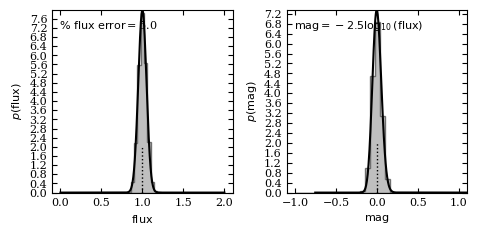

In [3]:
# Using the 5%
plot_bar_first(0.05)

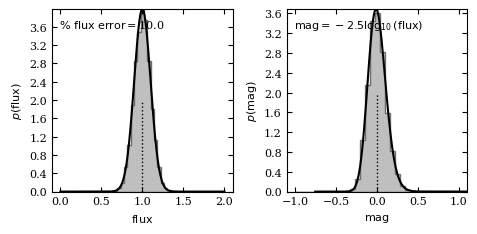

In [4]:
# Using the 10%
plot_bar_first(0.10)

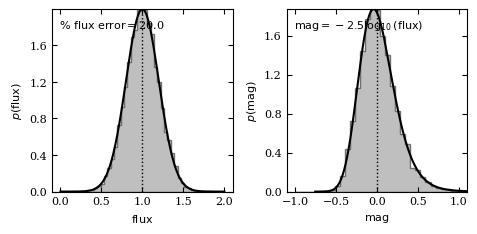

In [5]:
# Using the 20%
plot_bar_first(0.20)

# 2. Create 1000 draws from a normal distribution of mean of 1.5 and standard deviation of 0.5. Plot the pdf. Calculate the sample mean, variance, skewness, kurtosis as well as standard deviation using MAD and σG of these samples.

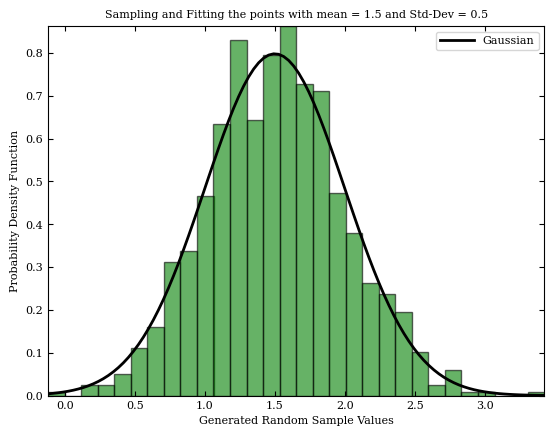


Sample Mean : 1.5097
Sample Variance : 0.2395
Sample Skewness : 0.1168
Sample Kurtosis : 0.0662
Standard Deviation (MAD) : 0.3231
Standard Deviation (σG) : 0.2179


In [6]:
# Import all the Necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, skew, kurtosis

# Set the seed to generate random values
np.random.seed(42)

# Generate the 1000 (1K) draws from a Normal distribution
# with mean  as 1.5 and std-deviation as 0.5
mean = 1.5
std_dev = 0.5
sample_size = 1000
data = np.random.normal(mean, std_dev, sample_size)

# Function to plot the PDF
def plot_bar_second():
    plt.hist(data, bins=30, density=True, alpha=0.6, color='g')
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mean, std_dev)
    plt.plot(x, p, 'k', linewidth=2, label="Gaussian")
    plt.legend()
    plt.title("Sampling and Fitting the points with mean = " + str(round(mean, 2)) + " and Std-Dev = " + str(round(std_dev, 2)))
    plt.xlabel('Generated Random Sample Values')
    plt.ylabel('Probability Density Function')
    plt.show()

# Ploting the PDF of the sampled Normal Distribution
plot_bar_second()


# Calculate sample statistics as asked in the question
generated_sample_mean = np.mean(data)          # Sample Mean
generated_sample_variance = np.var(data)       # Sample Variance
generated_sample_skewness = skew(data)         # Sample Skewness
generated_sample_kurtosis = kurtosis(data)     # Sample Kurtosis
generated_sample_mad = np.median(np.abs(data - np.median(data)))  # Sample standard deviation using MAD (Median Absolute Deviation)
generated_sample_sigma_g = 0.6745 * generated_sample_mad    #  Sample σG (Modified Z-score)


# Display all the calculations
print()
print("Sample Mean :", round(generated_sample_mean, 4))
print("Sample Variance :", round(generated_sample_variance, 4))
print("Sample Skewness :", round(generated_sample_skewness, 4))
print("Sample Kurtosis :", round(generated_sample_kurtosis, 4))
print("Standard Deviation (MAD) :", round(generated_sample_mad, 4))
print("Standard Deviation (σG) :", round(generated_sample_sigma_g, 4))


# 3. Plot a Cauchy distribution with μ=0 and γ=1.5 superposed on the top of a Gaussian distribution with μ=0 and σ=1.5. Use two different line styles to distinguish between the Gaussan and Cauchy distribution on the plot and also indicate these in the legends.

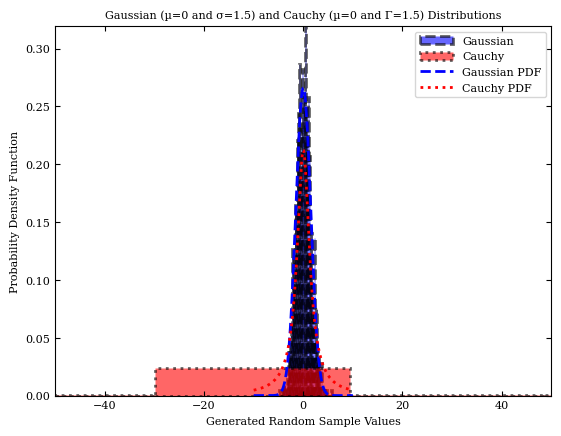

In [7]:
# Import all the Necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import cauchy, norm

# Generate the 1000 (1K) draws from a Normal distribution
# with mean as 0.0 and std-deviation as 1.5
np.random.seed(42)
mean_gaussian = 0
sigma_gaussian = 1.5
data_gaussian = np.random.normal(mean_gaussian, sigma_gaussian, 1000)

# Generate the 1000 (1K) draws from a Cauchy distribution
# with mean as 0.0 and std-deviation as 1.5
mean_cauchy = 0
gamma_cauchy = 1.5
data_cauchy = np.random.standard_cauchy(1000) * gamma_cauchy


def plot_bar_third():
    plt.hist(data_gaussian, bins=50, density=True, alpha=0.6, color='blue', linestyle='dashed', linewidth=2, label='Gaussian')
    plt.hist(data_cauchy, bins=50, density=True, alpha=0.6, color='red', linestyle='dotted', linewidth=2, label='Cauchy')
    x = np.linspace(-10, 10, 1000)
    pdf_gaussian = norm.pdf(x, mean_gaussian, sigma_gaussian)
    pdf_cauchy = cauchy.pdf(x, loc=mean_cauchy, scale=gamma_cauchy)
    plt.plot(x, pdf_gaussian, 'b--', label='Gaussian PDF', linewidth=2)
    plt.plot(x, pdf_cauchy, 'r:', label='Cauchy PDF', linewidth=2)
    plt.legend()
    plt.xlim(-50, 50)
    plt.title('Gaussian (µ=0 and σ=1.5) and Cauchy (µ=0 and Γ=1.5) Distributions')
    plt.xlabel('Generated Random Sample Values')
    plt.ylabel('Probability Density Function')
    plt.show()


# Ploting the PDF of the sampled Normal Distribution
plot_bar_third()

# 4. Plot Poisson distribution with mean of 5, superposed on top of a Gaussian distribution with mean of 5 and standard deviation of square root of 5. Use two different line styles for the two distributions and make sure the plot contains legends for both of them.

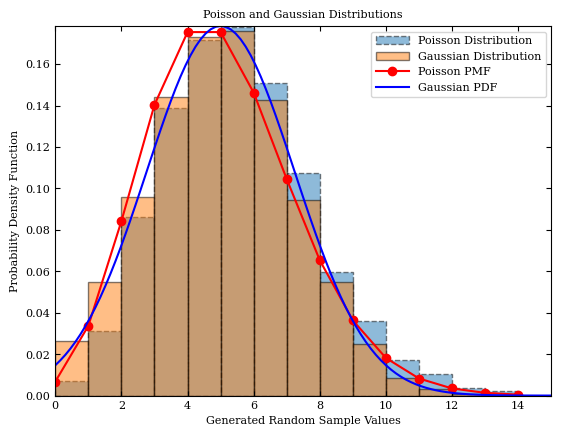

In [8]:
# Import all the Necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson, norm

# Generate the 1000 (1K) draws from a Normal distribution
# with mean as 5.0 and std-deviation as √(5.0)
np.random.seed(42)
mean_gaussian = 5
std_dev_gaussian = np.sqrt(5)
data_gaussian = np.random.normal(mean_gaussian, std_dev_gaussian, size=10000)

# Generate the 1000 (1K) draws from a Poisson distribution
# with mean as 5.0
mean_poisson = 5
data_poisson = np.random.poisson(mean_poisson, size=10000)


def plot_bar_fourth():
    plt.hist(data_poisson, bins=range(0, 15), alpha=0.5, label='Poisson Distribution', density=True, linestyle='dashed', edgecolor='black')
    plt.hist(data_gaussian, bins=range(0, 15), alpha=0.5, label='Gaussian Distribution', density=True, linestyle='solid', edgecolor='black')
    x_poisson = np.arange(0, 15)
    plt.plot(x_poisson, poisson.pmf(x_poisson, mean_poisson), 'ro-', label='Poisson PMF')
    x_gaussian = np.linspace(0, 15, 100)
    plt.plot(x_gaussian, norm.pdf(x_gaussian, mean_gaussian, std_dev_gaussian), 'b-', label='Gaussian PDF')
    plt.xlabel('Generated Random Sample Values')
    plt.ylabel('Probability Density Function')
    plt.title('Poisson and Gaussian Distributions')
    plt.legend()
    plt.show()

plot_bar_fourth()

# 5. The following were the measurements of mean lifetime of K meson (as of 1990) (in units of 10−10 s) : 0.8920±0.00044; 0.881±0.009; 0.8913±0.00032; 0.9837±0.00048; 0.8958± 0.00045. Calculate the weighted mean lifetime and uncertainty of the mean.


Weighted Mean Lifetime: 0.9089185199574896
Uncertainty of the Mean: 0.00020318737026848627



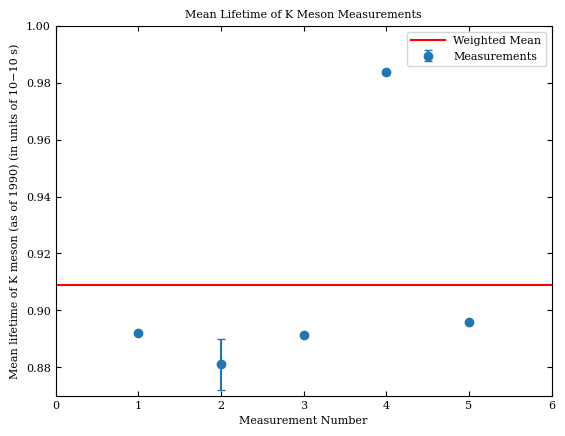

In [9]:
# Import all the Necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Given measurements
x_values = np.array([0.8920, 0.881, 0.8913, 0.9837, 0.8958])
delta_x_values = np.array([0.00044, 0.009, 0.00032, 0.00048, 0.00045])

# Calculate Weights and Weighted Mean
weights = 1 / (delta_x_values**2)
weighted_mean = np.sum(weights * x_values) / np.sum(weights)

# Calculate uncertainty of the mean
uncertainty_of_mean = np.sqrt(1 / np.sum(weights))

print()
print("Weighted Mean Lifetime:", weighted_mean)
print("Uncertainty of the Mean:", uncertainty_of_mean)
print()


def plot_bar_fifth():
    plt.errorbar(range(1, 6), x_values, yerr=delta_x_values, fmt='o', label='Measurements')
    plt.axhline(y=weighted_mean, color='r', linestyle='-', label='Weighted Mean')
    plt.xlim(0, 6)
    plt.ylim(0.87, 1.0)
    plt.xlabel('Measurement Number')
    plt.ylabel('Mean lifetime of K meson (as of 1990) (in units of 10−10 s)')
    plt.title('Mean Lifetime of K Meson Measurements')
    plt.legend()
    plt.show()


plot_bar_fifth()

# 6. Download the eccentricity distribution of exoplanets from the exoplanet catalog http://exoplanet.eu/catalog/. Look for the column titled e, which denotes the eccentricity. Draw the histogram of this distribution. Then redraw the same histogram after Gaussianizing the distribution using Box Transformation either using scipy.stats.boxcox or from first principles using the equations shown in class or in arXiv:1508.00931. Note that exoplanets without eccentricity data can be ignored.




  The columns in the given dataset are :  

Column 0 :   alternate_names

Column 1 :   angular_distance

Column 2 :   dec

Column 3 :   detection_type

Column 4 :   discovered

Column 5 :   eccentricity

Column 6 :   eccentricity_error_max

Column 7 :   eccentricity_error_min

Column 8 :   geometric_albedo

Column 9 :   geometric_albedo_error_max

Column 10 :   geometric_albedo_error_min

Column 11 :   hot_point_lon

Column 12 :   impact_parameter

Column 13 :   impact_parameter_error_max

Column 14 :   impact_parameter_error_min

Column 15 :   inclination

Column 16 :   inclination_error_max

Column 17 :   inclination_error_min

Column 18 :   k

Column 19 :   k_error_max

Column 20 :   k_error_min

Column 21 :   lambda_angle

Column 22 :   lambda_angle_error_max

Column 23 :   lambda_angle_error_min

Column 24 :   log_g

Column 25 :   mag_h

Column 26 :   mag_i

Column 27 :   mag_j

Column 28 :   mag_k

Column 29 :   mag_v

Column 30 :   mass

Column 31 :   mass_detection_type

Colum

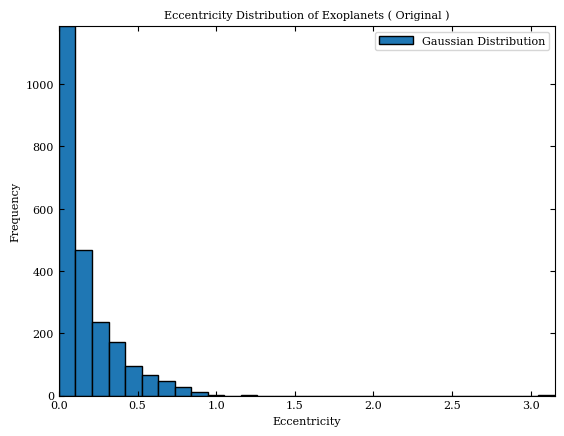

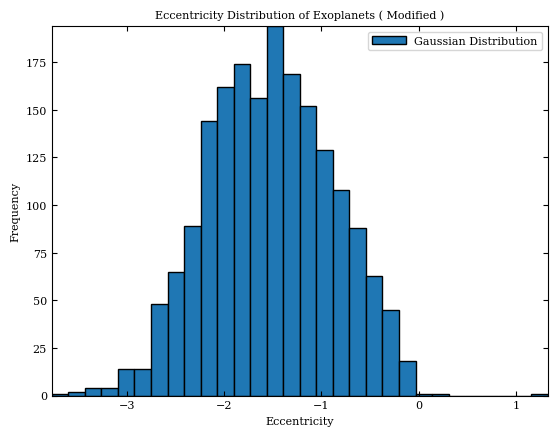

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import boxcox


# Load the Exoplanet data from the downloaded dataset
data = pd.read_csv('eccentricity_data.csv')
print("\n  The columns in the given dataset are :  \n")
for idx, ele in enumerate(sorted(data.columns)):
  print("Column "+ str(idx) +" :  ", ele)
  print()

# Filter the exoplanets without eccentricity data can be ignored
data = data.dropna(subset=['eccentricity'])
# print(data)

# Plot the histogram showing the Eccentricity Distribution ( Original )
plt.hist(data['eccentricity'], bins=30, edgecolor='black', label="Gaussian Distribution")
plt.xlabel('Eccentricity')
plt.ylabel('Frequency')
plt.legend()
plt.title('Eccentricity Distribution of Exoplanets ( Original )')
plt.show()



# Apply Box-Cox transformation
data = data[data['eccentricity'] > 0]   # Since only the positive entries are allowed
transformed_eccentricity, lambda_value = boxcox(data['eccentricity'])
print()
print()

# Plot the histogram showing the Eccentricity Distribution ( Modified )
plt.hist(transformed_eccentricity, bins=30, edgecolor='black', label="Gaussian Distribution")
plt.xlabel('Eccentricity')
plt.ylabel('Frequency')
plt.legend()
plt.title('Eccentricity Distribution of Exoplanets ( Modified )')
plt.show()

